In [107]:
import pandas as pd
import geopandas as gpd
import requests
import geojson
from pyproj import CRS
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [5]:
url = "http://geo.stat.fi/geoserver/tilastointialueet/wfs"

# Specify parameters (read data in json format). 
params = {"service": 'WFS',
          "version": '2.0.0',
          "request": 'GetFeature', 
          "typeName": 'tilastointialueet:kunta4500k',
          "outputFormat": 'json'}

# Fetch data from WFS using request - returns response object
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson and a coordinate reference system
data = gpd.GeoDataFrame.from_features(geojson.loads(r.content),
                                      crs="EPSG:3067")

In [6]:
data.head()

,geometry,kunta,vuosi,nimi,namn,name,bbox
0,"POLYGON ((366787.924 7001300.583, 362458.797 6...",005,2021,Alajärvi,Alajärvi,Alajärvi,"[321987.07200161, 6959704.55099558, 366787.924..."
1,"POLYGON ((382543.364 7120022.976, 372645.944 7...",009,2021,Alavieska,Alavieska,Alavieska,"[360962.99200022, 7104339.03799839, 382543.364..."
2,"POLYGON ((343298.204 6961570.195, 345569.224 6...",010,2021,Alavus,Alavo,Alavus,"[303353.32000378, 6922242.40698068, 345569.224..."
3,"POLYGON ((436139.680 6798279.085, 435912.756 6...",016,2021,Asikkala,Asikkala,Asikkala,"[403543.81899999, 6774122.31100019, 442401.762..."
4,"POLYGON ((426631.036 6720528.076, 432565.266 6...",018,2021,Askola,Askola,Askola,"[413073.96299999, 6704555.87800016, 435459.201..."


In [9]:
data = data.drop("bbox", axis=1)

In [12]:
DATA_PATH = Path("../data")

In [14]:
layer_name = "finland_municipalities"

# enable writing to kml file
gpd.io.file.fiona.drvsupport.supported_drivers["LIBKML"] = "rw"

# drivers and extensions for various file format
drivers = {"ESRI Shapefile": "shp",
           "GeoJSON": "gjson",
           "LIBKML": "libkml",
           "GPKG": "gpkg"}

# Write layer to different file format
for driver, extension in drivers.items():
    # Create file path and file name
    file_name = DATA_PATH / f"{layer_name}.{extension}"
    # Write data using the correct driver
    data.to_file(file_name, driver=driver)
    sys.stdout.write(f"Created file: {file_name}\n")

Created file: ..\data\finland_municipalities.shp
Created file: ..\data\finland_municipalities.gjson


CPLE_FileIOError: b'ERROR Writing ..\\data\\finland_municipalities.libkml\\doc.kml to ..\\data\\finland_municipalities.libkml'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona\_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_FileIOError: b'ERROR Writing ..\\data\\finland_municipalities.libkml\\doc.kml to ..\\data\\finland_municipalities.libkml'


Created file: ..\data\finland_municipalities.libkml
Created file: ..\data\finland_municipalities.gpkg


## Geopandas

In [19]:
DATA_PATH = Path(r"C:\Users\andri\Documents\Important\Coding\Learning\Classes\Automating_GIS_processes\data\L2_data\NLS\2018\L4\L41\L4132R.shp")

In [40]:
data = gpd.read_file(DATA_PATH / "m_L4132R_p.shp")

In [22]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [41]:
data = (data
        [["RYHMA", "LUOKKA", "geometry"]]
        .rename(
            columns={
                "RYHMA": "group",
                "LUOKKA": "type"
            }
        )
       )        

In [42]:
data.head()

,group,type,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [29]:
data.shape

(4311, 3)

In [30]:
data["group"].value_counts()

64    4311
Name: group, dtype: int64

In [43]:
data["type"].value_counts()

34100    3005
35412     449
32611     257
35300     134
33100     118
32421     110
32800      80
36200      56
35411      35
32900      28
32612      11
36313       8
35421       5
33000       5
34700       3
32200       2
32500       2
32111       1
32112       1
34300       1
Name: type, dtype: int64

<AxesSubplot:>

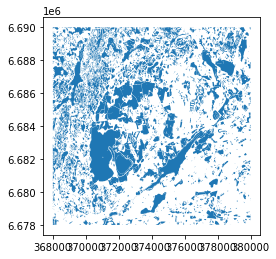

In [32]:
data.plot()

In [44]:
data = (data
        .assign(
            area= lambda x:x["geometry"].area
        )
       )

In [45]:
data.head()

,group,type,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


In [46]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   group     4311 non-null   int64   
 1   type      4311 non-null   int64   
 2   geometry  4311 non-null   geometry
 3   area      4311 non-null   float64 
dtypes: float64(1), geometry(1), int64(2)
memory usage: 134.8 KB


In [47]:
lakes = data.query("type==36200")

<AxesSubplot:>

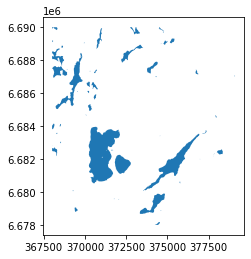

In [48]:
lakes.plot()

In [49]:
OUTPUT_PATH = Path("../data/L2_data")
lakes.to_file(OUTPUT_PATH / "type_36200.shp")

In [50]:
temp = gpd.read_file(OUTPUT_PATH / "type_36200.shp")

In [51]:
temp.head()

,group,type,area,geometry
0,64,36200,1318.878221,"POLYGON ((379089.473 6687069.722, 379093.838 6..."
1,64,36200,22918.867073,"POLYGON ((376732.156 6687178.141, 376731.301 6..."
2,64,36200,5759.318345,"POLYGON ((377939.741 6684539.678, 377929.192 6..."
3,64,36200,265899.648379,"POLYGON ((372948.857 6688594.047, 372935.951 6..."
4,64,36200,128221.314258,"POLYGON ((370900.963 6689201.649, 370890.077 6..."


<AxesSubplot:>

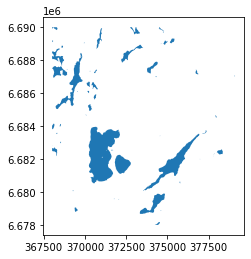

In [52]:
temp.plot()

In [59]:
for t in data["type"].unique():
    filename = f"terrain_{t}.shp"
    sys.stdout.write(f"Saving file: {filename}\n")
    (data
     .query("type==@t")
     .to_file(OUTPUT_PATH / filename)
    )

Saving file: terrain_32421.shp
Saving file: terrain_32200.shp
Saving file: terrain_34300.shp
Saving file: terrain_34100.shp
Saving file: terrain_34700.shp
Saving file: terrain_32500.shp
Saving file: terrain_32112.shp
Saving file: terrain_32111.shp
Saving file: terrain_32611.shp
Saving file: terrain_32612.shp
Saving file: terrain_32800.shp
Saving file: terrain_32900.shp
Saving file: terrain_35300.shp
Saving file: terrain_35412.shp
Saving file: terrain_35411.shp
Saving file: terrain_35421.shp
Saving file: terrain_33000.shp
Saving file: terrain_33100.shp
Saving file: terrain_36200.shp
Saving file: terrain_36313.shp


## Map projections

In [60]:
data = gpd.read_file(OUTPUT_PATH / "Europe_borders.shp")

In [61]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


<AxesSubplot:>

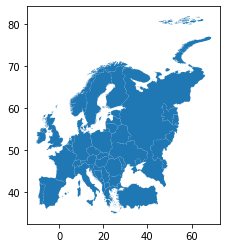

In [62]:
data.plot()

In [63]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
data_latlon = data.copy()
data_eqarea = data.to_crs(epsg=3035)

<AxesSubplot:>

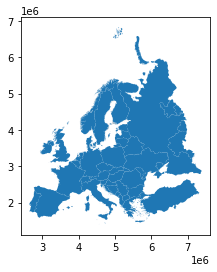

In [65]:
data_eqarea.plot()

In [66]:
data_eqarea.to_file(OUTPUT_PATH / "Europe_borders_epsg3035.shp")

### Global projections

In [67]:
data = gpd.read_file(OUTPUT_PATH / "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [68]:
data.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [75]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

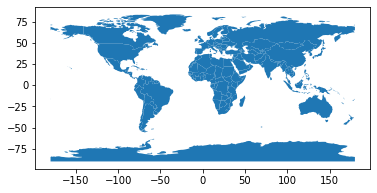

In [76]:
data.plot()

<AxesSubplot:>

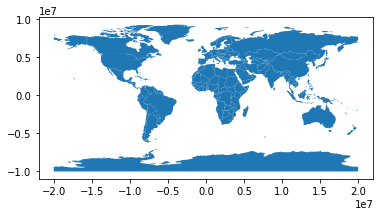

In [81]:
# World equidistand cylindrical (sphere)
(data
 .to_crs("EPSG:4088")
 .plot()
)

<AxesSubplot:>

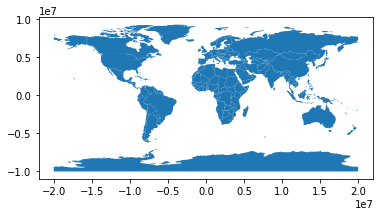

In [82]:
# World equidistant cylindrical
(data
 .to_crs("EPSG:4087")
 .plot()
)

In [97]:
(data
 .query("'Antar' in SOVEREIGNT")
)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry


In [96]:
data["SOVEREIGNT"].unique()

array(['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan',
       'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas',
       'United Kingdom', 'Norway', 'Denmark', 'France', 'East Timor',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'Ecuador', 'Jamaica', 'Cuba', 'Zimbabwe',
       'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
       'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Central African Republic',
       'Republic of the Congo', 'Gabon', 'Equatorial

<AxesSubplot:>

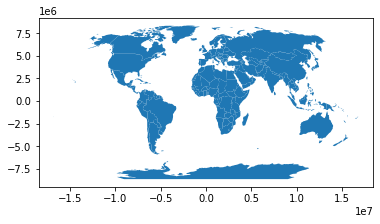

In [94]:
# Robinson
(data
 .to_crs("ESRI:54030")
 .plot()
)

<AxesSubplot:>

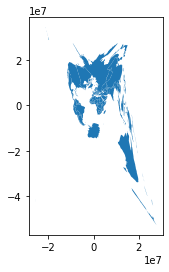

In [95]:
# Cassini
(data
 .to_crs("ESRI:54028")
 .plot()
)

<AxesSubplot:>

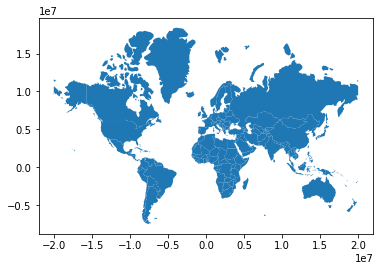

In [101]:
# Mercator 
(data
 .loc[~data["SOVEREIGNT"].str.contains("Antar")]
 .to_crs("EPSG:3395")
 .plot()
)

## Excercises

In [103]:
# Longitudes in decimal degrees
longitudes = [29.99671173095703, 31.58196258544922, 27.738052368164062, 
              26.50013542175293, 26.652359008789062, 25.921663284301758, 
              22.90027618408203, 23.257217407226562, 23.335693359375, 
              22.87444305419922, 23.08465003967285, 22.565473556518555,
              21.452774047851562, 21.66388702392578, 21.065969467163086,
              21.67659568786621, 21.496871948242188, 22.339998245239258, 
              22.288192749023438, 24.539581298828125, 25.444232940673828, 
              25.303749084472656, 24.669166564941406, 24.689163208007812,
              24.174999237060547, 23.68471908569336, 24.000761032104492, 
              23.57332992553711, 23.76513671875, 23.430830001831055, 
              23.6597900390625, 20.580928802490234, 21.320831298828125,
              22.398330688476562, 23.97638702392578, 24.934917449951172, 
              25.7611083984375, 25.95930290222168, 26.476804733276367,
              27.91069221496582, 29.1027774810791, 29.29846954345703,
              28.4355525970459, 28.817358016967773, 28.459857940673828, 
              30.028610229492188, 29.075136184692383, 30.13492774963379, 
              29.818885803222656, 29.640830993652344, 30.57735824584961,
              29.99671173095703]

# Latitudes in decimal degrees
latitudes = [63.748023986816406, 62.90789794921875, 60.511383056640625, 
             60.44499588012695, 60.646385192871094, 60.243743896484375, 
             59.806800842285156, 59.91944122314453, 60.02395248413086, 
             60.14555358886719, 60.3452033996582, 60.211936950683594, 
             60.56249237060547, 61.54027557373047, 62.59798049926758, 
             63.02013397216797, 63.20353698730469, 63.27652359008789, 
             63.525691986083984, 64.79915618896484, 64.9533920288086, 
             65.51513671875, 65.65470886230469, 65.89610290527344, 
             65.79151916503906, 66.26332092285156, 66.80228424072266,
             67.1570053100586, 67.4168701171875, 67.47978210449219, 
             67.94589233398438, 69.060302734375, 69.32611083984375, 
             68.71110534667969, 68.83248901367188, 68.580810546875, 
             68.98916625976562, 69.68568420410156, 69.9363784790039, 
             70.08860778808594, 69.70597076416016, 69.48533630371094, 
             68.90263366699219, 68.84700012207031, 68.53485107421875, 
             67.69471740722656, 66.90360260009766, 65.70887756347656, 
             65.6533203125, 64.92096710205078, 64.22373962402344, 
             63.748023986816406]

In [106]:
coords = [(lon, lat) for (lon, lat) in zip(longitudes, latitudes)]

In [109]:
coords

[(29.99671173095703, 63.748023986816406),
 (31.58196258544922, 62.90789794921875),
 (27.738052368164062, 60.511383056640625),
 (26.50013542175293, 60.44499588012695),
 (26.652359008789062, 60.646385192871094),
 (25.921663284301758, 60.243743896484375),
 (22.90027618408203, 59.806800842285156),
 (23.257217407226562, 59.91944122314453),
 (23.335693359375, 60.02395248413086),
 (22.87444305419922, 60.14555358886719),
 (23.08465003967285, 60.3452033996582),
 (22.565473556518555, 60.211936950683594),
 (21.452774047851562, 60.56249237060547),
 (21.66388702392578, 61.54027557373047),
 (21.065969467163086, 62.59798049926758),
 (21.67659568786621, 63.02013397216797),
 (21.496871948242188, 63.20353698730469),
 (22.339998245239258, 63.27652359008789),
 (22.288192749023438, 63.525691986083984),
 (24.539581298828125, 64.79915618896484),
 (25.444232940673828, 64.9533920288086),
 (25.303749084472656, 65.51513671875),
 (24.669166564941406, 65.65470886230469),
 (24.689163208007812, 65.89610290527344),
 

In [110]:
poly = Polygon(coords)

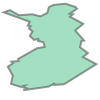

In [111]:
poly

In [117]:
geo = gpd.GeoDataFrame()

In [118]:
geo.at[0, "geometry"] = poly

In [119]:
geo.at[0, "location"] = "Finland"

In [120]:
geo

,geometry,location
0,"POLYGON ((29.99671 63.74802, 31.58196 62.90790...",Finland


In [126]:
geo = geo.set_crs(epsg=4326)

<AxesSubplot:>

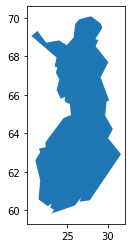

In [127]:
geo.plot()

### Exercise 2

In [135]:
from shapely.geometry import Point
import numpy as np

In [158]:
data = (pd.read_csv("../data/some_posts.csv")
        .assign(
            geometry=lambda y:y.apply(lambda x:Point(x["lon"], x["lat"]), axis=1)
        )
       )

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [138]:
data.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.980792492 31.484633302)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.499224667 31.508905612)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.342578456 30.930866066)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461393 31.519718439)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.921068894 31.520835558)


In [159]:
geo = gpd.GeoDataFrame.from_records(
    data=data.to_dict(orient="records")
)

In [140]:
geo.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.98079 31.48463)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.49922 31.50891)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.34258 30.93087)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461 31.51972)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.92107 31.52084)


In [141]:
data2 = pd.read_csv("../data/some_posts.csv")
geo2 = gpd.GeoDataFrame(
    data=data2,
    geometry=gpd.points_from_xy(data2["lon"], data2["lat"])
)

In [143]:
geo2.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)


In [160]:
geo = geo.set_crs(epsg=4326)

In [161]:
geo.to_file("../data/Kruger_posts.shp")

In [150]:
import contextily as cx

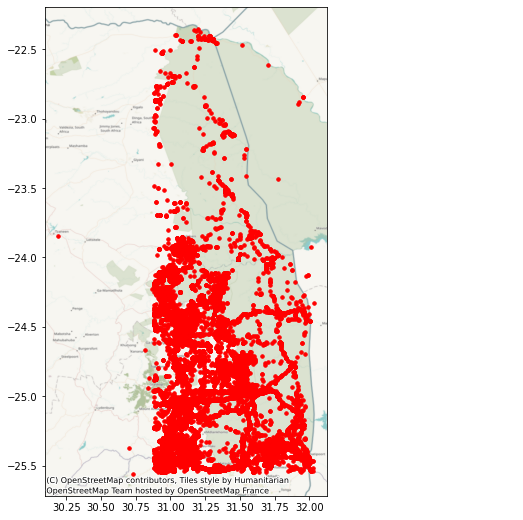

In [173]:
fig, ax = plt.subplots(figsize=(6, 9))
geo.plot(
    ax=ax,
    color="red",
    markersize=12
)
cx.add_basemap(ax,
               crs=geo.crs,
               source=cx.providers.OpenStreetMap.HOT
              )
# ax.set_xlim(-40, 0)
# ax.set_ylim(20, 60)

In [176]:
geo = geo.to_crs("EPSG:32735")

In [177]:
grouped = geo.groupby("userid")

In [184]:
from shapely.geometry import LineString

In [230]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [232]:
users_move = (geo
              .sort_values(
                  by=["userid", "timestamp"]
              )
              .to_crs(crs="EPSG:32735")
              .groupby(by=["userid"])
              .agg(
                  counts=("userid", len),
                  steps=("geometry", list)
              )
              .query("counts > 1")
              .assign(
                  path=lambda y:y.apply(
                      lambda x:LineString(x["steps"]), axis=1
                  ),
                  path_length=lambda y:y.apply(
                      lambda x:x["path"].length, axis=1
                  )
              )
              .drop(["counts", "steps"], axis=1)
              .reset_index()                  
             )

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [227]:
users_move.head()

,userid,path,path_length
0,16301,LINESTRING (942231.6303657251 7254606.86776091...,328455.115430
1,45136,LINESTRING (905394.5001520057 7193375.14848753...,0.000000
2,50136,LINESTRING (944551.6068488198 7253384.18283521...,159189.081019
3,88775,LINESTRING (902800.8165515768 7192546.97504934...,0.080245
4,88918,LINESTRING (959332.9607456123 7219877.71476312...,9277.252211


In [228]:
# Shortest distance
shortest = users_move["path_length"].min()
print(f"The shortest traveled distance is: {shortest:.2f} meters")
longest = users_move["path_length"].max()
print(f"The longest traveled distance is: {longest:.2f} meters")
mean = users_move["path_length"].mean()
print(f"The mean traveled distance is: {mean:.2f} meters")

The shortest traveled distance is: 0.00 meters
The longest traveled distance is: 6970666.69 meters
The mean traveled distance is: 107133.59 meters


In [234]:
geo_movements = gpd.GeoDataFrame(
    data=users_move.drop(["path"], axis=1),
    geometry=users_move["path"]
)

In [235]:
geo_movements.to_file("../data/some_movements.shp")

C:\Users\andri\AppData\Local\Temp/ipykernel_6092/2419755061.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_movements.to_file("../data/some_movements.shp")
